# Comparando modelos de regresión (y *overffiting*)

## Configuración del entorno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_regression(X, y, X_test = None, y_test = None, model = None):
    plt.scatter(X, y, color='blue', label='Train')
    if X_test is not None:
        plt.scatter(X_test, y_test, color='orange', label='Test')
    X_plot = pd.DataFrame(np.linspace(X.min(), X.max(), num=100), columns= X.columns)
    if model is not None:
        plt.plot(X_plot, model.predict(X_plot), color='red', label='Modelo')
    plt.xlabel("Años de experiencia")
    plt.ylabel("Salario")
    if X_test is not None or model is not None:
        plt.legend()
    plt.show()

## Definición del problema y preparación de datos

Retomando los ejemplos vistos en los notebooks de algoritmos de regresión lineal simple y árboles de decisión, vamos a poner el énfasis en el concepto de *overfitting*, valorando la importancia de la separación de los datos en conjuntos de entrenamiento y test.

Vamos a tomar los datos de  predicción de salarios en función de años de experiencia laboral.

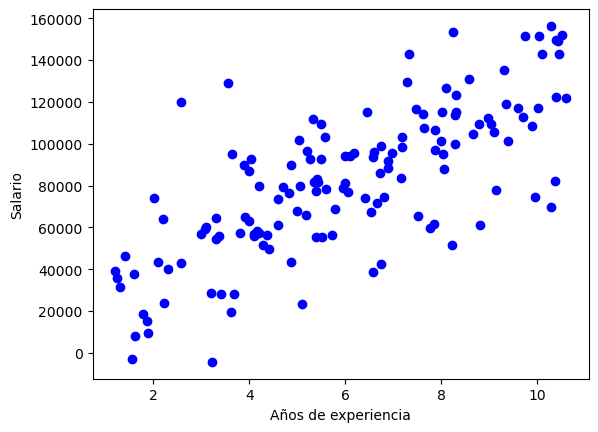

In [3]:
df = pd.read_csv("data/salaries2.csv")

X = df[['YearsExperience']]
y = df['Salary']

plot_regression(X, y)

y definir como medida de rendimiento la raí­z del error absoluto medio (MAE).

In [4]:
from sklearn.metrics import mean_absolute_error

Separamos los datos en dos conjuntos, uno de entrenamiento y otro de test. Entrenamos los modelos con los datos de entrenamiento y evaluaremos su rendimiento en el conjunto de test.
<!-- TODO: más bien debería usarse el de validación, pero está pendiente de introducir -->

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresión lineal

Entrenamos un modelo de regresión lineal con los datos de entrenamiento.

In [6]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression().fit(X_train, y_train)

podemos ver la representación gráfica de la regresión lineal en rojo, calculada con los datos de entrenamiento (las muestra en azul) y los datos de test en naranja (que es con los que se evaluará el rendimiento del modelo).

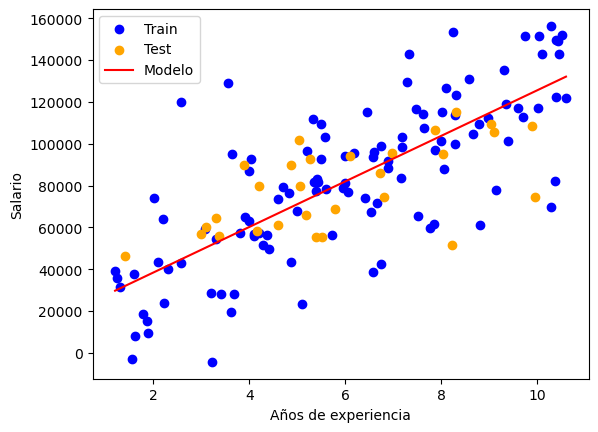

In [7]:
plot_regression(X_train, y_train, X_test, y_test, model_linear)

y calculamos el rendimiento del modelo **con el conjunto de test**: cuánto se desvían las predicciones que hace el modelo (entrenado con el conjunto de entrenamiento) de los valores reales.

In [8]:
y_test_pred = model_linear.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_test_pred)
print("MAE Regresión lineal: ", mae_linear)

MAE Regresión lineal:  14907.430403616389


Vemos que el modelo de regresión lineal se desvía en media 13895 US$ anuales del salario real.

Si hubiesemos calculado la desviación con el conjunto de entrenamiento, el error no sería tan diferente en este caso.

In [9]:
mae_linear_train = mean_absolute_error(y_train, model_linear.predict(X_train))
print("MAE Regresión lineal (train): ", mae_linear_train)

MAE Regresión lineal (train):  18637.585417551847


## Árbol de regresión

Entrenamos ahora un árbol de regresión con los datos de entrenamiento sin limitar la profundidad del árbol.

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor().fit(X_train, y_train)

representando el modelo, se puede ver el ***overfitting*** con bastante claridad.

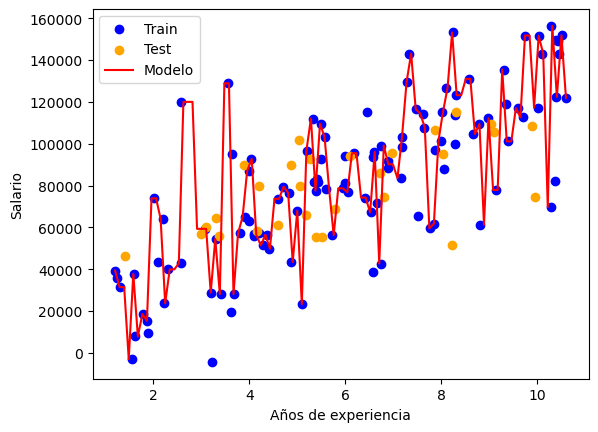

In [11]:
plot_regression(X_train, y_train, X_test, y_test, tree_reg)

El overfitting es evidente, ya que el modelo se ajusta perfectamente a los datos de entrenamiento, pero no generaliza bien a los datos de test. En este caso se puede ver visualmente, pero también nos lo demuestra la gran diferencia entre el error de entrenamiento y el de test.

In [12]:
print("MAE Árbol de decisión: ", mean_absolute_error(y_test, tree_reg.predict(X_test)))
print("MAE Árbol de decisión (train): ", mean_absolute_error(y_train, tree_reg.predict(X_train)))

MAE Árbol de decisión:  23707.072586206898
MAE Árbol de decisión (train):  276.1498230088495


Limitando la profundidad del árbol, podemos reducir el sobreajuste.

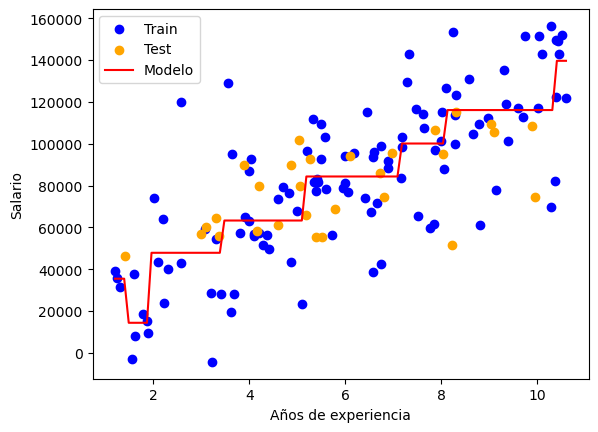

MAE Árbol de decisión:  15990.510519561638
MAE Árbol de decisión (train):  16839.020069257407


In [13]:
tree_reg = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plot_regression(X_train, y_train, X_test, y_test, tree_reg)
print("MAE Árbol de decisión: ", mean_absolute_error(y_test, tree_reg.predict(X_test)))
print("MAE Árbol de decisión (train): ", mean_absolute_error(y_train, tree_reg.predict(X_train)))

La elección de profundidad en este caso se ha hecho probando con distintos valores y viendo cuál es el que mejor rendimiento tiene en el conjunto de test (baja hasta 3, pero en 4 ya se empieza a sobreajustar). Hay métodos más automáticos para hacer esto que veremos más adelante.

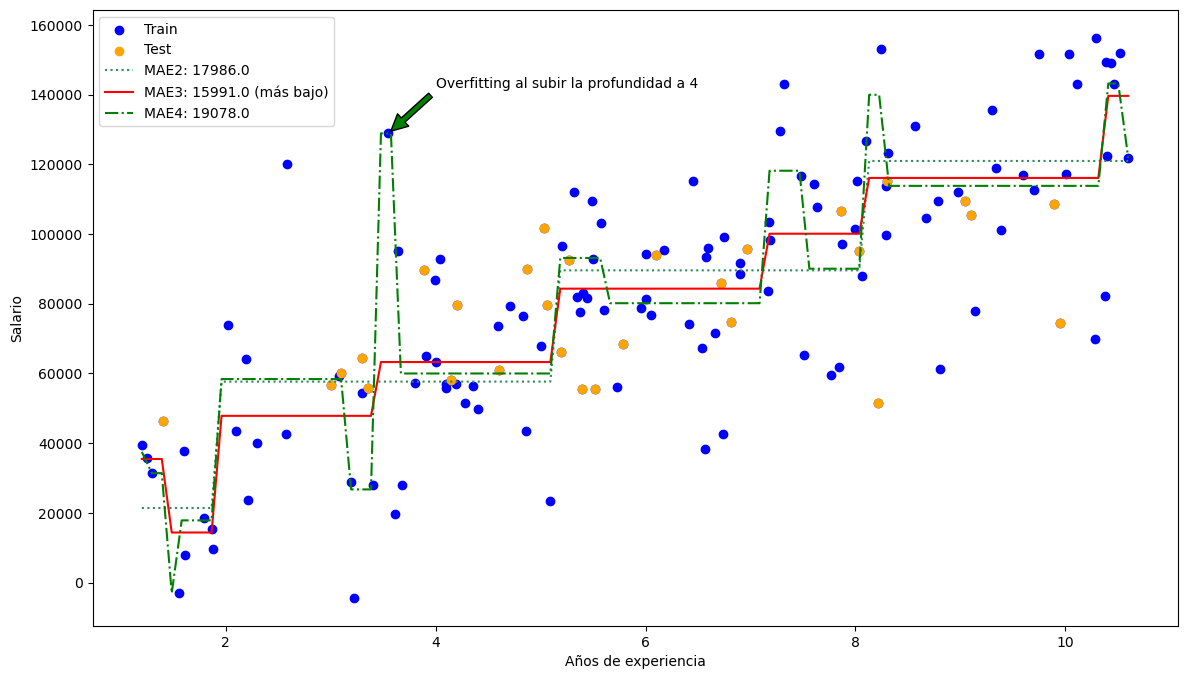

In [14]:
plt.figure(figsize=(14, 8))

plt.scatter(X, y, color='blue', label='Train')
plt.scatter(X_test, y_test, color='orange', label='Test') 

X_plot = pd.DataFrame(np.linspace(X.min(), X.max(), num=100), columns= X.columns)

tree_reg2 = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
mae2 = round(mean_absolute_error(y_test, tree_reg2.predict(X_test)), 0)
tree_reg3 = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
mae3 = round(mean_absolute_error(y_test, tree_reg3.predict(X_test)), 0)
tree_reg4 = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
mae4 = round(mean_absolute_error(y_test, tree_reg4.predict(X_test)), 0)

plt.plot(X_plot, tree_reg2.predict(X_plot), color='seagreen', label=f'MAE2: {mae2}', linestyle=':')
plt.plot(X_plot, tree_reg3.predict(X_plot), color='red', label=f'MAE3: {mae3} (más bajo)')
plt.plot(X_plot, tree_reg4.predict(X_plot), color='green', label=f'MAE4: {mae4}', linestyle='-.')

plt.annotate('Overfitting al subir la profundidad a 4', xy=(3.55, 128875.56), xytext=(4, 142000) , arrowprops=dict(facecolor='green', shrink=0.05))

plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.legend()
plt.show()

<!-- TODO: ## Regresión polinómica -->